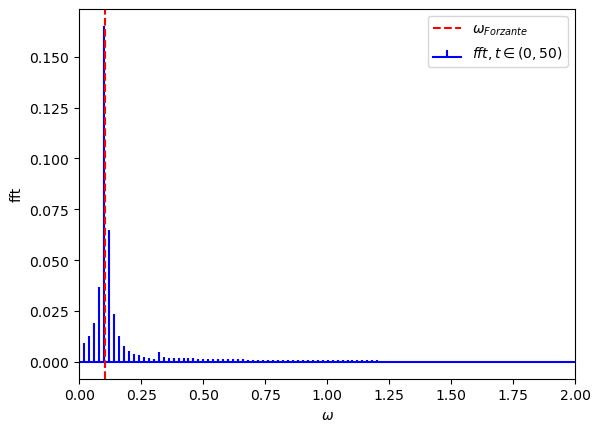

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq  # Import fft and fftfreq from scipy.fft

d = np.loadtxt("osAsf.txt")
t_po = d[:,0]
x_po = d[:,1]

# t = t_po
# x = x_po

t = []
x = []
min = 0
max = 50

for i in range(len(t_po)):
    if t_po[i] > min and t_po[i] < max:
        t.append(t_po[i])
        x.append(x_po[i])

fx = fft(x)
sum_fx = sum(np.abs(fx))

sampling_frequency = 1 / (t[1] - t[0])
freq = fftfreq(len(fx), 1 / sampling_frequency)

normalized_amplitude = np.abs(fx) / sum_fx

plt.stem(freq, normalized_amplitude, 'b', markerfmt=" ", basefmt="-b", label=r"$fft, t\in(0, 50)$")
plt.xlabel(r"$\omega$")
plt.ylabel("fft")
plt.xlim(0, 2)
plt.axvline(x=1 / (3 * np.pi), color='r', linestyle='--', label=r"$\omega_{Forzante}$")
plt.legend()
plt.savefig("FFT_OscillatoreForzato.png")
plt.show()


Ricordati più aumenti la precisione sul tempo più sei impreciso sulle frequenze, è Heisenberg

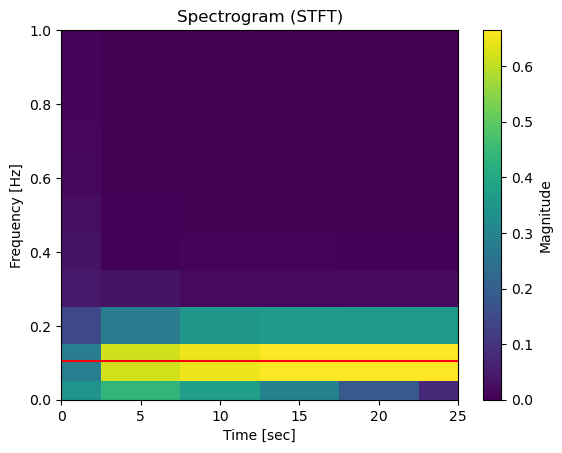

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Load your audio data (replace 'your_audio_file.wav' with your file)
# Example: fs, data = wavfile.read('your_audio_file.wav')
# Ensure the audio file is in the same directory as your script or provide the correct path.

# Set your sampling frequency (fs) and the data array
fs = 10  # Adjust according to your data
d = np.loadtxt("osAsf.txt")
t = d[:,0]
data = d[:,1]

# Compute STFT
f, t, Zxx = stft(data, fs=fs, nperseg=100)

x = np.linspace(0, 50, 1000)
y = (1 / (3 * np.pi)) * np.ones_like(x) 
plt.plot(x, y, c = "r")

# Plot the spectrogram
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 1)
plt.xlim(0, 25)
plt.xlabel('Time [sec]')
plt.title('Spectrogram (STFT)')
plt.colorbar(label='Magnitude')
plt.show()